In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Call cliente

In [2]:
# Source: https://statistics.cepal.org/portal/cepalstat/dashboard.html?theme=2&lang=es
def get_data() -> tuple:
    import requests
    URL = "https://api-cepalstat.cepal.org/cepalstat/api/v1/indicator/2203/data?members=214%2C216%2C218%2C219%2C220%2C221%2C222%2C224%2C225%2C226%2C249%2C228%2C229%2C230%2C234%2C235%2C237%2C238%2C239%2C246%2C233%2C240%2C241%2C242%2C244%2C264%2C257%2C260%2C262%2C263%2C256%2C258%2C259%2C223%2C29160%2C29161%2C29162%2C29163%2C29164%2C29165%2C29166%2C29167%2C29168%2C29169%2C29170%2C29171%2C29172%2C29173%2C29174%2C29175%2C29176%2C29177%2C29178%2C29179%2C29180%2C29181%2C29182%2C29183%2C29184%2C29185%2C29186%2C29187%2C29188%2C29189%2C29190&lang=es&format=json&in=1&app=dashboard"
    try:
        response = requests.get(URL)
        print(response)
        data_res = response.json()
        print("last_update >>",data_res["body"]["metadata"]["last_update"])
        return data_res["body"]["data"], data_res["body"]["dimensions"]
    except:
        raise Exception("Not possible get data")


# Process Data

In [3]:
# Get Data
data,dim = get_data()

# id, country_name
dict_dim = dict([(get_i["id"], get_i["name"]) for get_i in dim[0]["members"]])

import re
# Appropiate data
for data_i in data:
    data_i["dim_208"] = dict_dim[data_i["dim_208"]] if "(" not in dict_dim[data_i["dim_208"]] else re.sub(r' \(.*',"",dict_dim[data_i["dim_208"]])
    data_i["dim_29117"] = int(data_i["dim_29117"]) - 27170
    data_i["latitude"] = 0.0
    data_i["longitude"] = 0.0
    del data_i["source_id"]
    del data_i["notes_ids"]


<Response [200]>
last_update >> Jun  9 2022  4:19PM


# to Dataframe - corrects types

In [4]:
df = pd.DataFrame.from_dict(data)
df.columns = ["value","mote","year","name",'latitude', 'longitude']
df['value'] = df['value'].astype(float)
df.dtypes

value        float64
mote          object
year           int64
name          object
latitude     float64
longitude    float64
dtype: object

In [8]:
df.tail()

,value,mote,year,name,latitude,longitude
1047,4217.450803,BRB,2006,Barbados,0.0,0.0
1048,4674.007452,BRB,2007,Barbados,0.0,0.0
1049,4784.925079,BRB,2008,Barbados,0.0,0.0
1050,4465.657315,BRB,2009,Barbados,0.0,0.0
1051,4529.928302,BRB,2010,Barbados,0.0,0.0


## Dataset latitude and longitude
* source: https://www.kaggle.com/datasets/paultimothymooney/latitude-and-longitude-for-every-country-and-state?resource=download

In [9]:
import os
print(os.listdir(os.getcwd()))
df_pos = pd.read_csv("world_country_and_usa_states_latitude_and_longitude_values.csv")

['world_country_and_usa_states_latitude_and_longitude_values.csv', '.DS_Store', 'README.md', 'pib-py.ipynb', '.gitignore', '.ipynb_checkpoints', '.git']


In [10]:
df_pos[df_pos["country"] == "Argentina"]

,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
10,AR,-38.416097,-63.616672,Argentina,GA,32.157435,-82.907123,Georgia


In [11]:
df_pos.head()

,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,AD,42.546245,1.601554,Andorra,AK,63.588753,-154.493062,Alaska
1,AE,23.424076,53.847818,United Arab Emirates,AL,32.318231,-86.902298,Alabama
2,AF,33.939110,67.709953,Afghanistan,AR,35.201050,-91.831833,Arkansas
3,AG,17.060816,-61.796428,Antigua and Barbuda,AZ,34.048928,-111.093731,Arizona
4,AI,18.220554,-63.068615,Anguilla,CA,36.778261,-119.417932,California


In [12]:
df["name"].unique()

array(['Antigua y Barbuda', 'Argentina', 'Bahamas', 'Barbados', 'Belice',
       'Bolivia', 'Brasil', 'Chile', 'Colombia', 'Costa Rica', 'Cuba',
       'Dominica', 'Ecuador', 'El Caribe', 'El Salvador', 'Granada',
       'Guatemala', 'Guyana', 'Haití', 'Honduras', 'Jamaica', 'México',
       'Nicaragua', 'Panamá', 'Paraguay', 'Perú', 'República Dominicana',
       'Saint Kitts y Nevis', 'San Vicente y las Granadinas',
       'Santa Lucía', 'Suriname', 'Trinidad y Tabago', 'Uruguay',
       'Venezuela'], dtype=object)

In [13]:
def set_latitude_and_longitude(df, name_i, english_name=None):
    if english_name is not None:
        df.loc[df["name"]==name_i,"latitude"] = float(df_pos.loc[df_pos["country"] == english_name,"latitude"])
        df.loc[df["name"]==name_i,"longitude"] = float(df_pos.loc[df_pos["country"] == english_name,"longitude"])
    else:
        df.loc[df["name"]==name_i,"latitude"] = float(df_pos.loc[df_pos["country"] == name_i,"latitude"])
        df.loc[df["name"]==name_i,"longitude"] = float(df_pos.loc[df_pos["country"] == name_i,"longitude"])
    return df

for name_i in df["name"].unique():
    if "Brasil" in name_i:
        df = set_latitude_and_longitude(df, name_i, "Brazil")
    elif "México" in name_i:
        df = set_latitude_and_longitude(df, name_i, "Mexico")
    elif "Perú" in name_i:
        df = set_latitude_and_longitude(df, name_i, "Peru")
    elif "República Dominicana" in name_i:
        df = set_latitude_and_longitude(df, name_i, "Dominican Republic")
    elif "Haití" in name_i:
        df = set_latitude_and_longitude(df, name_i, "Haiti")
    elif "Panamá" in name_i:
        df = set_latitude_and_longitude(df, name_i, "Panama")
    elif "Trinidad y Tabago" in name_i:
        df = set_latitude_and_longitude(df, name_i, "Trinidad and Tobago")
    elif "San Vicente y las Granadinas" in name_i:
        df = set_latitude_and_longitude(df, name_i, "Saint Vincent and the Grenadines")
    else:
        if sum(df_pos["country"] == name_i) == 0: continue
        df = set_latitude_and_longitude(df, name_i, None)

In [14]:
df.head()

,value,mote,year,name,latitude,longitude
0,1157.662963,ATG,2006,Antigua y Barbuda,0.0,0.0
1,1312.759259,ATG,2007,Antigua y Barbuda,0.0,0.0
2,1370.070370,ATG,2008,Antigua y Barbuda,0.0,0.0
3,1228.329630,ATG,2009,Antigua y Barbuda,0.0,0.0
4,1148.700000,ATG,2010,Antigua y Barbuda,0.0,0.0


In [15]:
df.loc[df["name"]=="Bolivia"].head()

,value,mote,year,name,latitude,longitude
71,4867.582598,BOL,1990,Bolivia,-16.290154,-63.588653
72,5343.261954,BOL,1991,Bolivia,-16.290154,-63.588653
73,5643.869242,BOL,1992,Bolivia,-16.290154,-63.588653
74,5734.699035,BOL,1993,Bolivia,-16.290154,-63.588653
75,5981.223301,BOL,1994,Bolivia,-16.290154,-63.588653


# Time Series

In [16]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import random
colors_names = [i for i in dict(**mcolors.CSS4_COLORS).keys()]

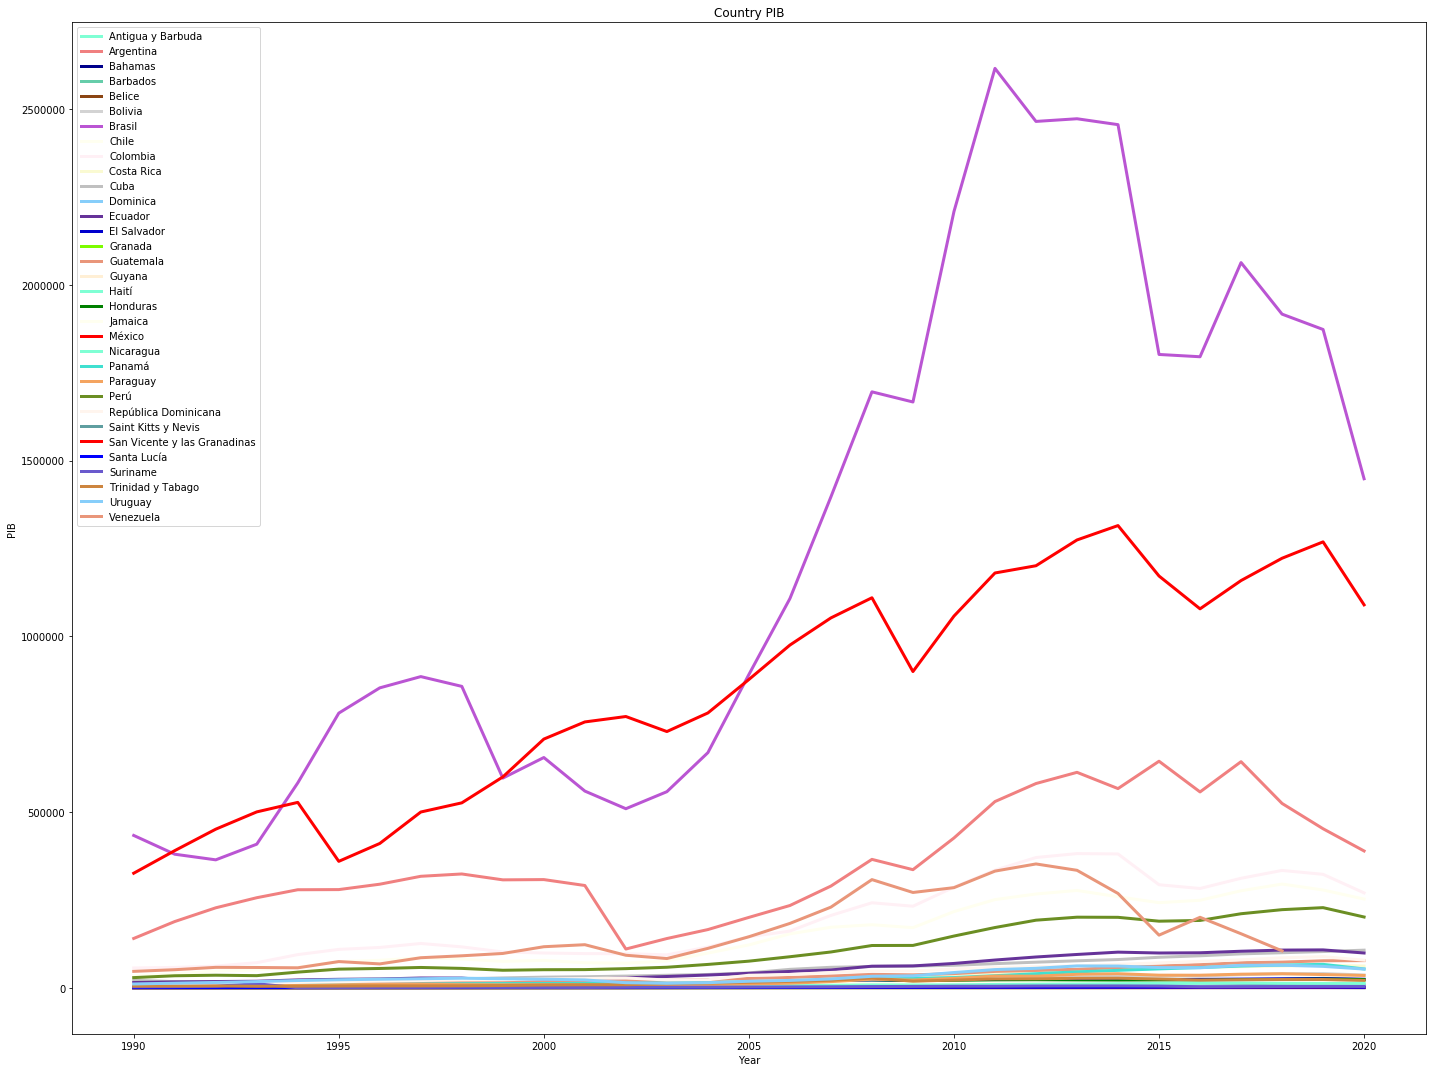

In [121]:
plt.figure(figsize=(20,15))
# Plot time series
for mote_i in df["mote"].unique():
    df_temp = df.loc[df["mote"]==mote_i,:]
    df_temp = df_temp.sort_values(by=['year']).reset_index()
    if mote_i is None : continue
    plt.plot(df_temp["year"], df_temp["value"], label=df_temp.loc[0,"name"], color=random.choice(tuple(colors_names)),linewidth=3)

# Add title and labels
plt.title('Country PIB')
plt.xlabel('Year')
plt.ylabel('PIB')

# Add legend
plt.legend()

# Auto space
plt.tight_layout()

# Display plot
plt.show() 


# World Map
* https://towardsdatascience.com/using-python-to-create-a-world-map-from-a-list-of-country-names-cd7480d03b10

In [17]:
total_pib_latin=0
for name_i in df["name"].unique():
    df_temp = df.loc[df["name"]==name_i,:]
    df_temp = df_temp.sort_values(by=['year']).reset_index()
    last_info = df_temp.tail(1)
    if last_info["latitude"].values[0]+last_info["longitude"].values[0] == 0.: continue
    total_pib_latin += last_info["value"].values[0]
print("total pib latin >>",total_pib_latin)

total pib latin >> 4500017.210018678


In [39]:
# Create a world map to show distributions of users 
import folium
from folium.plugins import MarkerCluster
#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of user percent
for name_i in df["name"].unique():
    df_temp = df.loc[df["name"]==name_i,:]
    df_temp = df_temp.sort_values(by=['year']).reset_index()
    last_info = df_temp.tail(1)
    if last_info["latitude"].values[0]+last_info["longitude"].values[0] == 0.: continue
    lat = last_info["latitude"].values[0]
    long = last_info["longitude"].values[0]
    percent_i = (last_info["value"].values[0]/total_pib_latin)*100
    radius=5
    popup_text = """Country : {}<br> %of Users : {}<br>"""
    popup_text = popup_text.format(last_info["name"].values[0],percent_i)
    folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
#show the map
world_map